https://www.geeksforgeeks.org/how-to-automate-data-cleaning-in-python/
https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd

In [115]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [116]:
#reading

In [117]:
df = pd.read_csv('Trendyol_Sales_Data_Dirty.csv')

In [118]:
df.shape

(1100, 14)

In [119]:
df.head()

,YEAR,month,CITY,CatEgory,PayMent_methoD,DEVICE_type,PROMOTion_used,CustSegment,ORDer_Value,Items sold,shipping_cost,Delivery_time,Product_rating,DiscOUNt
0,2020.0,4.0,@Bursa,NaN,Cr3dit C@rd,D3sktop,@Yes,@New,477.75,10.0,32.34 TRY,6.0,4.7,113.97
1,2023.0,11.0,@NA,Toys,Debit Card,Desktop,No,@Returning,369.63,4.0,34.56 TRY,2.0,4.6,103.36
2,2011.0,5.0,Samsun,@NA,E-W@ll3t,Desktop,No,@Returning,264.94,3.0,24.97 TRY,3.0,3.4,22.84
3,2017.0,2.0,diyarbakir,clothing,@E-Wallet,Mobil3,YES,@NA,353.31,8.0,36.25 TRY,4.0,3.6,59.85
4,2013.0,6.0,BURSA,NaN,CREDIT CARD,Desktop,YES,@Returning,NaN,6.0,43.16 TRY,4.0,4.2,7.82


<Axes: >

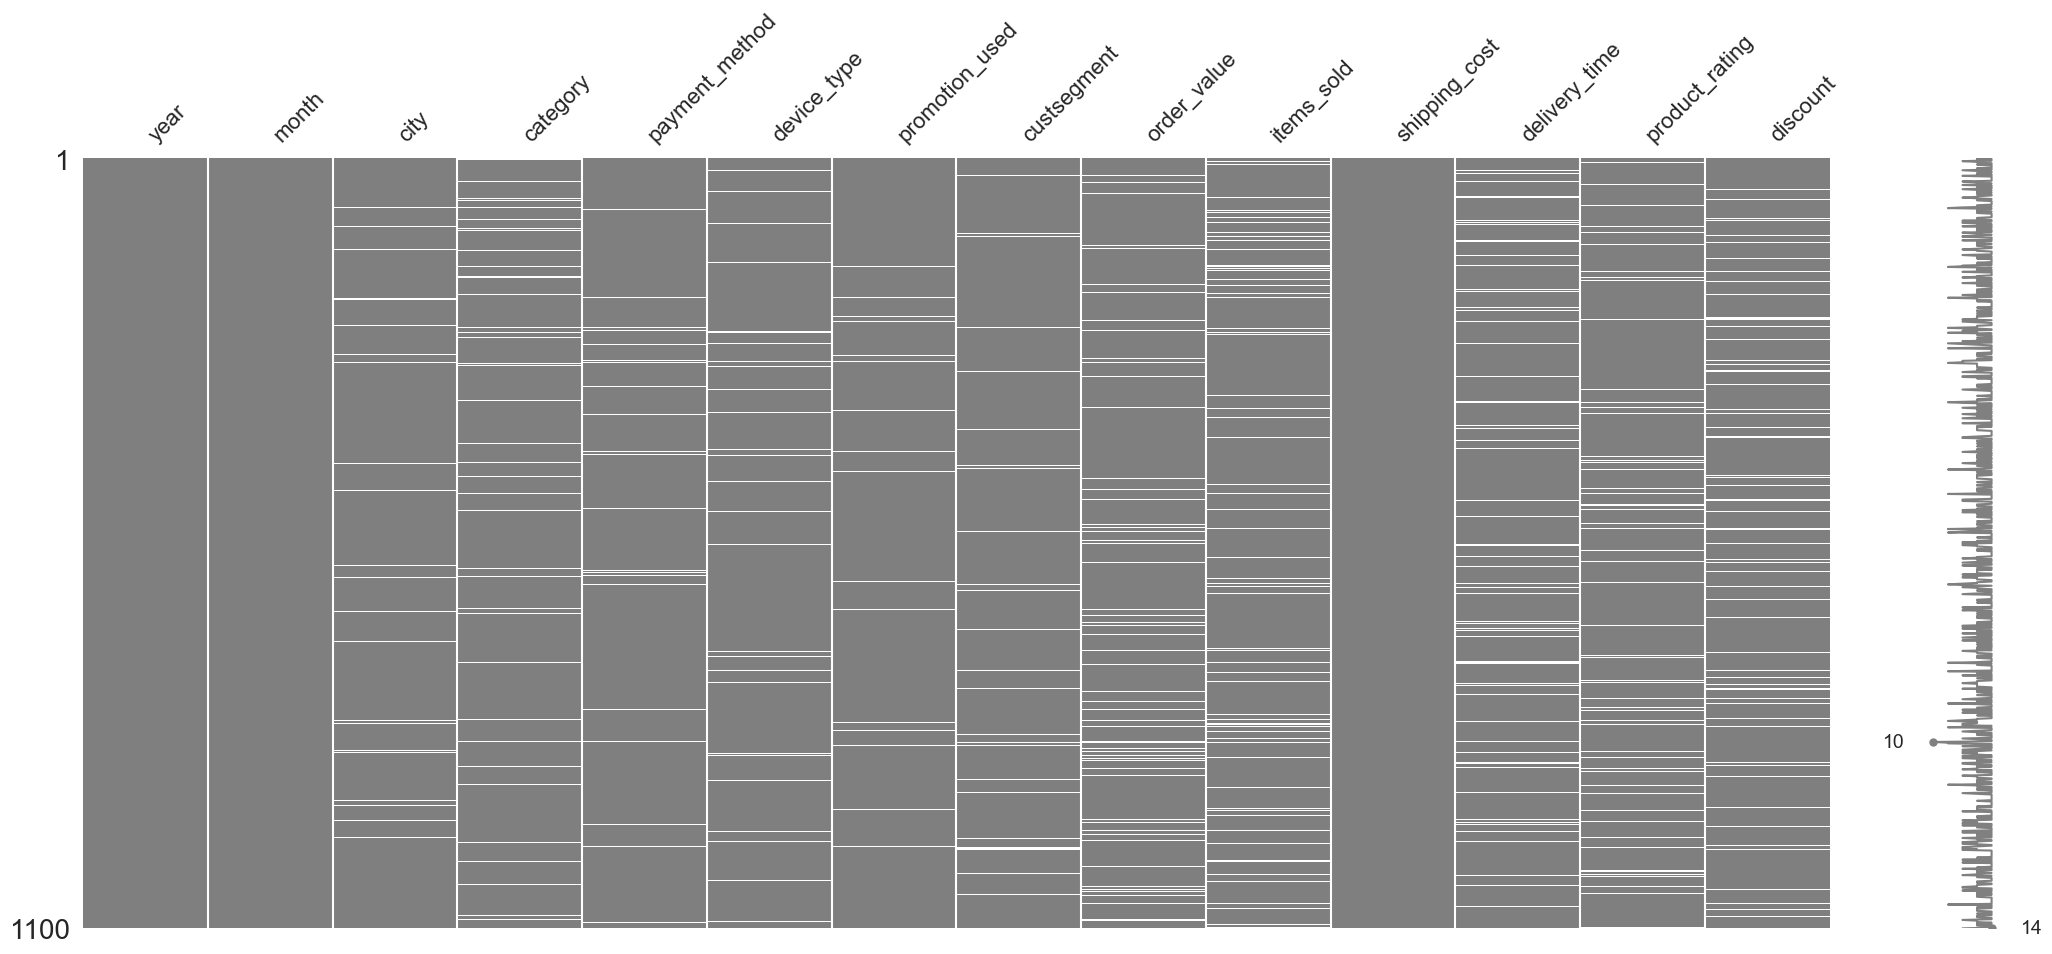

In [149]:
msno.matrix(df, color = (0.5, 0.5, 0.5))

In [121]:
df.tail()

,YEAR,month,CITY,CatEgory,PayMent_methoD,DEVICE_type,PROMOTion_used,CustSegment,ORDer_Value,Items sold,shipping_cost,Delivery_time,Product_rating,DiscOUNt
1095,2019.0,6.0,diyarbakir,@Beauty,DEBIT CARD,Desktop,NA,@Returning,369.58,NaN,18.53 TRY,1.0,4.1,96.98
1096,2017.0,12.0,Ad@n@,Clothing,E-W@ll3t,Tablet,@Yes,returning,308.40,9.0,26.38 TRY,2.0,4.3,35.76
1097,2019.0,8.0,konya,@Home,credit card,@Desktop,Y3s,RETURNING,446.99,7.0,58.41 TRY,7.0,3.1,94.61
1098,2013.0,4.0,ANKARA,Clothing,@Debit Card,DESKTOP,@Yes,@New,454.18,3.0,63.72 TRY,4.0,3.8,51.76
1099,2016.0,3.0,Kony@,clothing,na,tablet,@No,@New,202.42,NaN,14.81 TRY,6.0,NaN,48.62


In [122]:
#buradan eksik verileri anlayabiliyoruz.

In [123]:
df.describe()


,YEAR,month,ORDer_Value,Items sold,Delivery_time,Product_rating,DiscOUNt
count,1024.000000,1013.000000,1015.000000,1000.000000,1011.000000,1014.000000,1015.000000
mean,2016.387695,6.593287,284.198039,5.598000,4.057369,3.986588,44.229665
std,4.052091,3.443565,128.439806,2.764786,1.971247,0.567321,33.676211
min,2010.000000,1.000000,50.530000,1.000000,1.000000,3.000000,0.180000
25%,2013.000000,4.000000,174.585000,3.000000,2.000000,3.500000,16.865000
50%,2016.000000,7.000000,287.700000,6.000000,4.000000,4.000000,35.670000
75%,2020.000000,10.000000,394.640000,8.000000,6.000000,4.500000,66.430000
max,2023.000000,12.000000,499.760000,10.000000,7.000000,5.000000,145.120000


In [124]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['year', 'month', 'city', 'category', 'payment_method', 'device_type',
       'promotion_used', 'custsegment', 'order_value', 'items_sold',
       'shipping_cost', 'delivery_time', 'product_rating', 'discount'],
      dtype='object')

In [125]:
# Şehir isimlerini düzeltme
df['city'] = df['city'].str.replace('@', '').str.title()

# Kategori sütunundaki "@NA" değerlerini NaN yapma
df['category'] = df['category'].replace({'@NA': np.nan})

# Ödeme yöntemlerini düzeltme
df['payment_method'] = df['payment_method'].replace({
    'Cr3dit C@rd': 'Credit Card',
    'E-W@ll3t': 'E-Wallet',
    '@E-Wallet': 'E-Wallet',
    'CREDIT CARD': 'Credit Card'
})

# Cihaz isimlerini düzeltme
df['device_type'] = df['device_type'].replace({
    'D3sktop': 'Desktop',
    'Mobil3': 'Mobile'
})

# Abonelik durumunu düzeltme
df['promotion_used'] = df['promotion_used'].str.replace('@', '').str.title()

# Müşteri tipi sütunundaki "@New" ve "@Returning" değerlerini düzeltme
df['custsegment'] = df['custsegment'].str.replace('@', '')

# Fiyat sütunundaki "TRY" metnini kaldırma ve sayıya çevirme


In [126]:
#  kaç tane Na değeri var
print(df['year'].isna().sum())

76


In [127]:
x = df['year']
x

0       2020.0
1       2023.0
2       2011.0
3       2017.0
4       2013.0
         ...  
1095    2019.0
1096    2017.0
1097    2019.0
1098    2013.0
1099    2016.0
Name: year, Length: 1100, dtype: float64

In [128]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

df["year"] = imputer.fit_transform(df[["year"]]).ravel()

In [129]:
print(df['year'].isna().sum())

0


In [139]:
data.nunique()

YEAR               14
month              12
 CITY              83
CatEgory           33
PayMent_methoD     23
DEVICE_type        18
PROMOTion_used     13
CustSegment        13
ORDer_Value       919
Items sold         10
shipping_cost     842
Delivery_time       7
Product_rating     21
DiscOUNt          886
dtype: int64

In [138]:
res = list(set(df['year']))
print(res)

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2010, 2011, 2012, 2013, 2014, 2015]


In [136]:
# 'year' sütununu tam sayıya çevirme
df['year'] = df['year'].astype(int)

In [140]:
print(res)

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2010, 2011, 2012, 2013, 2014, 2015]


In [141]:
df.head()

,year,month,city,category,payment_method,device_type,promotion_used,custsegment,order_value,items_sold,shipping_cost,delivery_time,product_rating,discount
0,2020,4.0,Bursa,NaN,Credit Card,Desktop,Yes,New,477.75,10.0,32.34 TRY,6.0,4.7,113.97
1,2023,11.0,Na,Toys,Debit Card,Desktop,No,Returning,369.63,4.0,34.56 TRY,2.0,4.6,103.36
2,2011,5.0,Samsun,NaN,E-Wallet,Desktop,No,Returning,264.94,3.0,24.97 TRY,3.0,3.4,22.84
3,2017,2.0,Diyarbakir,clothing,E-Wallet,Mobile,Yes,NA,353.31,8.0,36.25 TRY,4.0,3.6,59.85
4,2013,6.0,Bursa,NaN,Credit Card,Desktop,Yes,Returning,NaN,6.0,43.16 TRY,4.0,4.2,7.82


In [142]:
print(df['month'].isna().sum())

87


In [143]:
imputer = KNNImputer(n_neighbors=2)

df["month"] = imputer.fit_transform(df[["month"]]).ravel()

In [144]:
print(df['month'].isna().sum())

0


In [145]:
res_1 = list(set(df['month']))
print(res_1)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.593287265547878, 8.0, 7.0, 10.0, 11.0, 12.0, 9.0]


In [147]:
df['month'] = df['month'].astype(int)

In [148]:
res_1 = list(set(df['month']))
print(res_1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
